# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [76]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [77]:
# Read your api key environment variable
api_key = ("3e3ed927e83645048ac5368252a1ed90")

In [78]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [79]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q ='Bitcoin', language ='en')
bitcoin_headlines

{'status': 'ok',
 'totalResults': 8088,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Khari Johnson',
   'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
   'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
   'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
   'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
   'publishedAt': '2021-07-19T11:00:00Z',
   'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'Kaseya ransomware attackers deman

In [80]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q ='Ethereum', language ='en')


In [81]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,text,compound,positive,negative,neutral
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903


In [82]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,text,compound,positive,negative,neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843
4,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806


In [83]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.020830,0.049000,0.045950,0.905000
std,0.399364,0.064777,0.054636,0.080938
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.381800,0.000000,0.000000,0.840250
50%,0.000000,0.000000,0.028500,0.916000
75%,0.202300,0.105750,0.077750,1.000000
max,0.726400,0.178000,0.184000,1.000000


In [84]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.235065,0.078650,0.024550,0.896800
std,0.387401,0.068866,0.035195,0.065884
min,-0.381800,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.361200,0.077500,0.000000,0.920000
75%,0.528675,0.149250,0.067500,0.925000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean postive score with .07865 vs Bitcoin .049

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score with a score of .7717

Q. Which coin had the highest positive score?

A: Ethereum had the highest postive score with a score of .194

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
4,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838,"[london, june, reuters, el, salvador, determin..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[anthony, di, iorio, cofounder, ethereum, netw..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N=2
bitcoin_ngrams = ngrams(tokenizer(bitcoin_df.text.str.cat()),N)
Counter(bitcoin_ngrams).most_common(5)

[(('reuters', 'bitcoin'), 6),
 (('june', 'reuters'), 4),
 (('losing', 'previous'), 4),
 (('previous', 'closebitcoin'), 4),
 (('closebitcoin', 'world'), 4)]

In [17]:
# Generate the Ethereum N-grams where N=2
N=2
ethereum_ngrams = ngrams(tokenizer(ethereum_df.text.str.cat()),N)
Counter(ethereum_ngrams).most_common(5)

[(('world', 'biggest'), 5),
 (('reuters', 'bitcoin'), 5),
 (('ethereum', 'network'), 4),
 (('charsby', 'reuters'), 4),
 (('losing', 'previous'), 4)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [32]:
# Use token_count to get the top 10 words for Bitcoin
top_10_tokens_bitcoin=tokenizer(bitcoin_df.text.str.cat())
token_count(top_10_tokens, 10)

[('cryptocurrency', 11),
 ('ethereum', 10),
 ('bitcoin', 10),
 ('reuters', 9),
 ('world', 7),
 ('network', 5),
 ('biggest', 5),
 ('charsby', 4),
 ('losing', 4),
 ('previous', 4)]

In [37]:
# Use token_count to get the top 10 words for Ethereum
top_10_tokens_ethereum=tokenizer(ethereum_df.text.str.cat())
token_count(top_10_tokens, 10)

[('cryptocurrency', 11),
 ('ethereum', 10),
 ('bitcoin', 10),
 ('reuters', 9),
 ('world', 7),
 ('network', 5),
 ('biggest', 5),
 ('charsby', 4),
 ('losing', 4),
 ('previous', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [34]:
# Generate the Bitcoin word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)


In [65]:
input_text = top_10_tokens_bitcoin
top_10_tokens_bitcoin
string_tokens = ""
for x in top_10_tokens_bitcoin:
    string_tokens= string_tokens+ x + " "
print(string_tokens)

like dogecoin devotee mayor reno leader el salvador aldo baoicchi convinced cryptocurrency future ceo founder canadian scooter maker daymak belief charsfiled underthe supply chain attack ha reached thousand organizationsillustration alex castro vergethree day ransomware attacker started holiday weekend comprom charsimage copyrightgetty imagesthe gang behind colossal ransomware attack ha demanded paid bitcoin return universal decryptor say unlock file charswhile retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still ha lot work come onboarding charslondon june reuters el salvador determined push ahead making bitcoin legal tender process bring small risk prove leap forward humanity country pr charslondon june reuters el salvador determined push ahead making bitcoin legal tender process bring small risk prove leap forward humanity country charsthis story originally appeared marketbeatwhen meme coin surged earlier year remember 

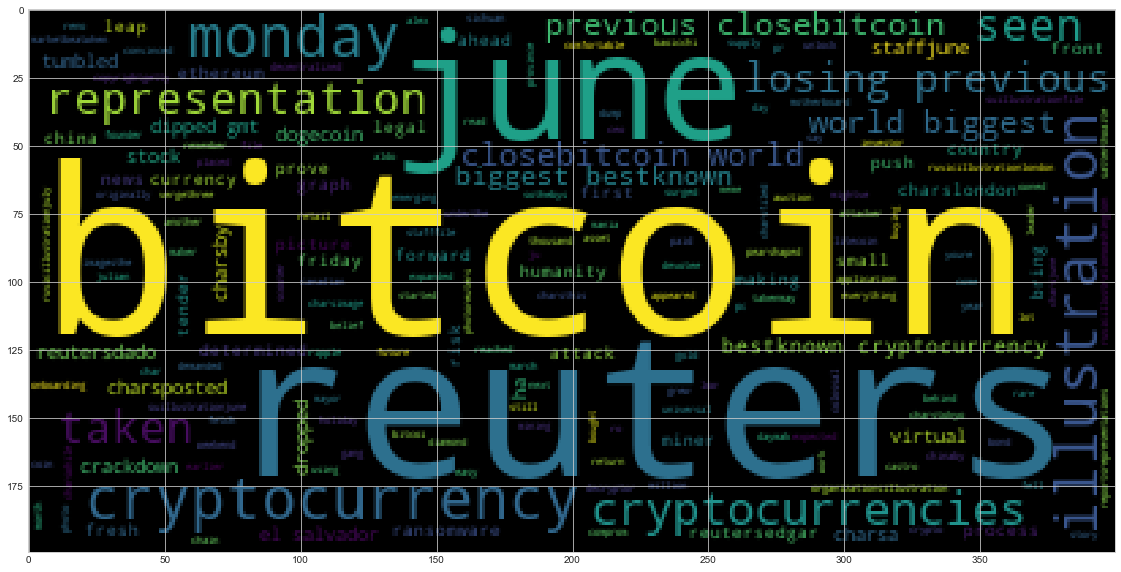

In [66]:
wc = WordCloud().generate(string_tokens)
plt.imshow(wc)


In [38]:
# Generate the Ethereum word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [58]:
input_text = top_10_tokens_ethereum
top_10_tokens_ethereum
string_tokens = ""
for x in top_10_tokens_ethereum:
    string_tokens_ethereum= string_tokens_ethereum+ x + " "
print(string_tokens_ethereum)

char many blockchain platform competing investor developer attention right big daddy ethereum socalled ethereum killers like solana wrote charswhile retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still ha lot work come onboarding charsit wasnt long ago average person clue nft wa nowadays theyre making headline selling hundred thousand buck predictably folk learning nfts charsbitcoin ethereumyuriko nakaoether overtook bitcoin number active address network friday sign demand faltering world biggest cryptocurrency co charsanthony di iorio cofounder ethereum network say done cryptocurrency world partially personal safety concern report bloomberg story shared slashdot charsether holder staked billion worth cryptocurrency ethereum network excitement build around overhaul system potential growth staki charsether cryptocurrency ethereum networkphotothekgetty imagesether holder staked billion worth cryptocurrency ethereum network e

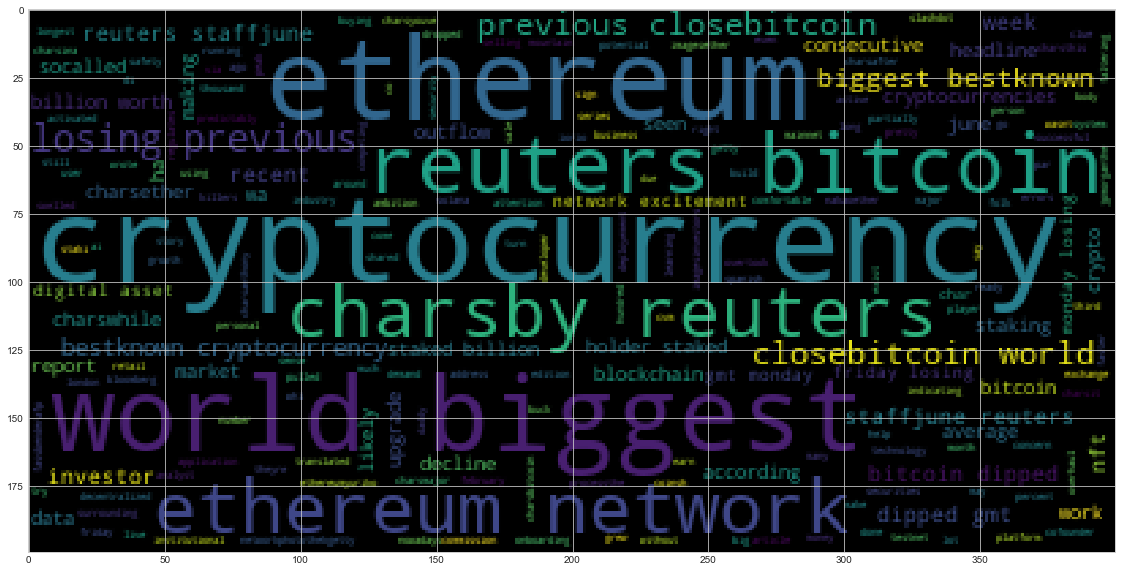

In [60]:
wc = WordCloud().generate(string_tokens_ethereum)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [67]:
# Concatenate all of the Bitcoin text together
string_tokens

'like dogecoin devotee mayor reno leader el salvador aldo baoicchi convinced cryptocurrency future ceo founder canadian scooter maker daymak belief charsfiled underthe supply chain attack ha reached thousand organizationsillustration alex castro vergethree day ransomware attacker started holiday weekend comprom charsimage copyrightgetty imagesthe gang behind colossal ransomware attack ha demanded paid bitcoin return universal decryptor say unlock file charswhile retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still ha lot work come onboarding charslondon june reuters el salvador determined push ahead making bitcoin legal tender process bring small risk prove leap forward humanity country pr charslondon june reuters el salvador determined push ahead making bitcoin legal tender process bring small risk prove leap forward humanity country charsthis story originally appeared marketbeatwhen meme coin surged earlier year remember

In [68]:
# Run the NER processor on all of the text
doc = nlp(string_tokens_ethereum)

# Add a title to the document
# YOUR CODE HERE!

In [69]:
# Render the visualization
displacy.render(doc, style='ent')

In [70]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ ])

['hundred thousand', 'friday', 'recent week', 'recent month', 'spanish', 'processthe securities exchange commission', 'reuters', 'friday', 'fassbenderafp', 'third week', 'february', 'reuters', 'friday', 'london', 'august', 'reuters', 'monday', 'reuters', 'monday', 'june', 'hackaday', 'charsnew york', 'june', 'reuters', 'sixth consecutive week', 'monday', 'hundred thousand', 'friday', 'recent week', 'recent month', 'spanish', 'processthe securities exchange commission', 'reuters', 'friday', 'fassbenderafp', 'third week', 'february', 'reuters', 'friday', 'london', 'august', 'reuters', 'monday', 'reuters', 'monday', 'june', 'hackaday', 'charsnew york', 'june', 'reuters', 'sixth consecutive week', 'monday']


---

### Ethereum NER

In [61]:
# Concatenate all of the Ethereum text together
string_tokens_ethereum

'char many blockchain platform competing investor developer attention right big daddy ethereum socalled ethereum killers like solana wrote charswhile retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still ha lot work come onboarding charsit wasnt long ago average person clue nft wa nowadays theyre making headline selling hundred thousand buck predictably folk learning nfts charsbitcoin ethereumyuriko nakaoether overtook bitcoin number active address network friday sign demand faltering world biggest cryptocurrency co charsanthony di iorio cofounder ethereum network say done cryptocurrency world partially personal safety concern report bloomberg story shared slashdot charsether holder staked billion worth cryptocurrency ethereum network excitement build around overhaul system potential growth staki charsether cryptocurrency ethereum networkphotothekgetty imagesether holder staked billion worth cryptocurrency ethereum network 

In [106]:
# Run the NER processor on all of the text
doc = nlp(string_tokens_ethereum)
# Add a title to the document


In [105]:
# Render the visualization
displacy.render(doc, style='ent')

In [75]:
# List all Entities
print([ent.text for ent in doc.ents])

['hundred thousand', 'friday', 'recent week', 'recent month', 'spanish', 'processthe securities exchange commission', 'reuters', 'friday', 'fassbenderafp', 'third week', 'february', 'reuters', 'friday', 'london', 'august', 'reuters', 'monday', 'reuters', 'monday', 'june', 'hackaday', 'charsnew york', 'june', 'reuters', 'sixth consecutive week', 'monday', 'hundred thousand', 'friday', 'recent week', 'recent month', 'spanish', 'processthe securities exchange commission', 'reuters', 'friday', 'fassbenderafp', 'third week', 'february', 'reuters', 'friday', 'london', 'august', 'reuters', 'monday', 'reuters', 'monday', 'june', 'hackaday', 'charsnew york', 'june', 'reuters', 'sixth consecutive week', 'monday']


---